image has been loaded
IMG_width = 458
IMG_height = 312
142896


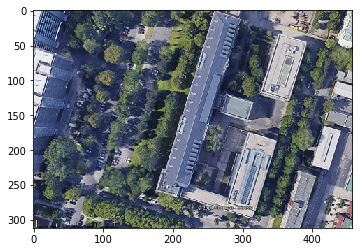

In [2]:
##Index_Test

import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import math

img1 = Image.open("test.tif")
img1 = img1.convert('RGB')  #it doesn't work for RGBA
img1_data = img1.load()

print('image has been loaded')
print("IMG_width = " + str(img1.width))
print("IMG_height = " + str(img1.height))
npixels = img1.width*img1.height
print(npixels)

plt.imshow(img1)

***************     calculating VDVI Index          **********************
****************     mask has been successfuly created     ***************
*****************       the results are shown below  *********************
**************************************************************************
Total vegetation area = 1333 square meters
Sick vegetation area = 211 square meters
Vegetation area under heavy stress = 322 square meters
Vegetation area under moderate stress = 330 square meters
Healthy vegetation area  = 468 square meters
A total number of 109553 pixels weren't labelled as vegetation
Total processed pixels = 142896
Total processed area = 5715 square meters
***********************************************************************


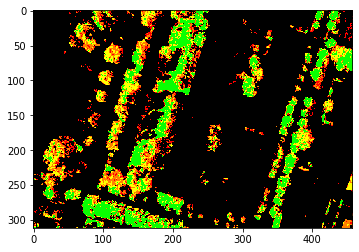

In [3]:
mask2 = Image.open("test.tif")
mask2 = mask2.convert('RGB')  #it doesn't work for RGBA
mask2_data = mask2.load()
pixelsize = 0.2
colors=[(255,0,0),(255,128,0),(255,255,0),(9,255,0),(0,0,0)]

print("***************     calculating VDVI Index          **********************")
size = mask2.width*mask2.height
pixlcount = 0
healthy = 0
moderate = 0
stressed = 0
sick = 0
discard = 0
seeker_column = 0
while seeker_column < mask2.width:
    seeker_row = 0
    while seeker_row < mask2.height:
        point = img1_data[seeker_column,seeker_row]
        num = 2*(point[1])-point[0]-point[2]
        den = 2*(point[1])+point[0]+point[2]
        if den==0:
            VDVI=0
        else:
            VDVI = num/den
        if VDVI <= 0.02:
            mask2_data[seeker_column,seeker_row]= colors[4]
            discard = discard+1
        else: 
            if VDVI <=0.04:
                mask2_data[seeker_column,seeker_row]= colors[0]
                sick = sick + 1
            else:
                if VDVI <=0.07:
                    mask2_data[seeker_column,seeker_row]= colors[1]
                    stressed = stressed + 1
                else:
                    if VDVI <=0.1:
                        mask2_data[seeker_column,seeker_row]= colors[2]
                        moderate = moderate + 1
                    else:
                        mask2_data[seeker_column,seeker_row]= colors[3]
                        healthy = healthy + 1

        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1

a_sick = sick*(pixelsize**2)
a_stressed = stressed*(pixelsize**2)
a_moderate = moderate*(pixelsize**2)
a_healthy = healthy*(pixelsize**2)
print("****************     mask has been successfuly created     ***************")
print("*****************       the results are shown below  *********************")
print("**************************************************************************")
print("Total vegetation area = "+str(int(a_sick+a_stressed+a_moderate+a_healthy))+" square meters" )
print("Sick vegetation area = "+str(int(a_sick))+" square meters" )
print("Vegetation area under heavy stress = "+str(int(a_stressed))+" square meters")
print("Vegetation area under moderate stress = "+str(int(a_moderate))+" square meters")
print("Healthy vegetation area  = "+str(int(a_healthy))+" square meters")
print("A total number of "+str(discard)+" pixels weren't labelled as vegetation")
print("Total processed pixels = "+str(size))
print("Total processed area = "+str(int(size*(pixelsize**2)))+str(" square meters"))
print("***********************************************************************")
plt.imshow(mask2)

***************     calculating VARI Index          **********************
***************     mask has been successfuly created          **********************
******************       the results are shown below  **********************


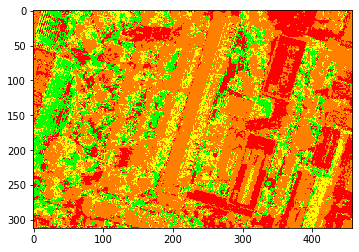

In [39]:
mask1 = Image.open("test.tif")
mask1 = mask1.convert('RGB')  #it doesn't work for RGBA
mask1_data = mask1.load()

colors=[(255,0,0),(255,128,0),(255,255,0),(9,255,0)]

print("***************     calculating VARI Index          **********************")
size = mask1.width*mask1.height
pixlcount = 0
seeker_column = 0
while seeker_column < mask2.width:
    seeker_row = 0
    while seeker_row < mask2.height:
        point = img1_data[seeker_column,seeker_row]
        num = point[1]-point[0]
        den = point[1]+point[0]-point[2]
        if den==0:
            VARI=0
        else:
            VARI = num/den
        if VARI <= 0:
            mask1_data[seeker_column,seeker_row]= colors[0]
        else: 
            if VARI <=0.3:
                mask1_data[seeker_column,seeker_row]= colors[1]
            else:
                if VARI <=0.7:
                    mask1_data[seeker_column,seeker_row]= colors[2]
                else:
                    mask1_data[seeker_column,seeker_row]= colors[3]

        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1
print("***************     mask has been successfuly created          **********************")
print("******************       the results are shown below  **********************")
plt.imshow(mask1)

***************     calculating NGRDI Index          **********************
***************     mask has been successfuly created          **********************
******************       the results are shown below  **********************


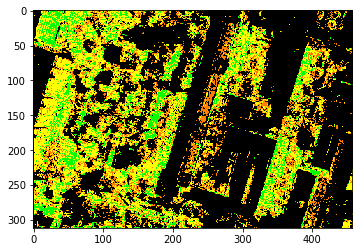

In [37]:
mask = Image.open("test.tif")
mask = mask.convert('RGB')  #it doesn't work for RGBA
mask_data = mask.load()

colors=[(255,0,0),(255,128,0),(255,255,0),(9,255,0),(0,0,0)]

print("***************     calculating NGRDI Index          **********************")
size = mask.width*mask.height
pixlcount = 0
seeker_column = 0
while seeker_column < mask.width:
    seeker_row = 0
    while seeker_row < mask.height:
        point = img1_data[seeker_column,seeker_row]
        num = point[1]-point[0]
        den = point[1]+point[0]
        if den==0:
            NGRDI=0
        else:
            NGRDI = num/den
        if NGRDI <= 0.08:
            mask_data[seeker_column,seeker_row]= colors[4]
        else: 
            if NGRDI <=0.1:
                mask_data[seeker_column,seeker_row]= colors[1]
            else:
                if NGRDI <=0.15:
                    mask_data[seeker_column,seeker_row]= colors[2]
                else:
                    mask_data[seeker_column,seeker_row]= colors[3]

        seeker_row = seeker_row + 1
    seeker_column = seeker_column + 1
print("***************     mask has been successfuly created          **********************")
print("******************       the results are shown below  **********************")
plt.imshow(mask)